# Insight into Job Reviews Data Set 

In [2]:
import pandas as pd
import sqlite3
import cufflinks as cf
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Reading the data

In [3]:
con = sqlite3.connect("../../collectors/data.sqlite3")
df = pd.read_sql_query("SELECT * from company_review", con)
con.close()

In [4]:
df.drop('title', axis=1, inplace=True)
df

,id,company,rating,author,author_status,location,date,description,source
0,1,bmo financial group,3.0,Credit Analyst (Current Employee),N/A,"Burnaby, BC",11 July 2018,Not a bad job but can get boring easily. Manag...,indeed.com
1,2,bmo financial group,3.0,Project Manager (Former Employee),N/A,"Toronto, ON",7 April 2020,co-workers are friendly but pay is not good at...,indeed.com
2,3,bmo financial group,1.0,Assistant Manager (Former Employee),N/A,"Cambridge, ON",6 April 2020,They give you the illusion of how great of a j...,indeed.com
3,4,bmo financial group,2.0,Software Specialist (Former Employee),N/A,"Toronto, ON",6 April 2020,"Basically, in BMO agile team, they hire 5+ per...",indeed.com
4,5,bmo financial group,5.0,Relationship Manager (Current Employee),N/A,"Nanaimo, BC",4 April 2020,Work/life balance and customer centric. Traini...,indeed.com
...,...,...,...,...,...,...,...,...,...
790,791,amazon,2.0,Order Picker/Forklift Operator (Former Employee),N/A,"Ottawa, ON",18 January 2020,Very fast paced hard on your feet need very co...,indeed.com
791,792,amazon,1.0,Hard worker (Current Employee),N/A,"Brampton, ON",18 January 2020,Alotta bad stuff happened i would report it an...,indeed.com
792,793,amazon,4.0,Risk Analyst • Fraud Risk & Compliance (Former...,N/A,"Barrie, ON",18 January 2020,It is a good company . I would recommend peopl...,indeed.com
793,794,amazon,4.0,seasonal warehouse associate (Former Employee),N/A,"Brampton, ON",17 January 2020,it is a faced paced work environment and compe...,indeed.com


# Data Preprocessing

In [5]:
df = df[~df['description'].isnull()]

def preprocess(DescriptionText):
    DescriptionText = DescriptionText.str.replace("(<br/>)", "")
    DescriptionText = DescriptionText.str.replace('(<a).*(>).*(</a>)', '')
    DescriptionText = DescriptionText.str.replace('(&amp)', '')
    DescriptionText = DescriptionText.str.replace('(&gt)', '')
    DescriptionText = DescriptionText.str.replace('(&lt)', '')
    DescriptionText = DescriptionText.str.replace('(\xa0)', ' ')  
    return DescriptionText
df['description'] = preprocess(df['description'])



# Sentiment Analysis on Job Reviews given by Employees

In [6]:
df['polarity'] = df['description'].map(lambda text: TextBlob(text).sentiment.polarity)


In [7]:
df

,id,company,rating,author,author_status,location,date,description,source,polarity
0,1,bmo financial group,3.0,Credit Analyst (Current Employee),N/A,"Burnaby, BC",11 July 2018,Not a bad job but can get boring easily. Manag...,indeed.com,0.154762
1,2,bmo financial group,3.0,Project Manager (Former Employee),N/A,"Toronto, ON",7 April 2020,co-workers are friendly but pay is not good at...,indeed.com,0.151190
2,3,bmo financial group,1.0,Assistant Manager (Former Employee),N/A,"Cambridge, ON",6 April 2020,They give you the illusion of how great of a j...,indeed.com,0.179167
3,4,bmo financial group,2.0,Software Specialist (Former Employee),N/A,"Toronto, ON",6 April 2020,"Basically, in BMO agile team, they hire 5+ per...",indeed.com,0.000000
4,5,bmo financial group,5.0,Relationship Manager (Current Employee),N/A,"Nanaimo, BC",4 April 2020,Work/life balance and customer centric. Traini...,indeed.com,0.250000
...,...,...,...,...,...,...,...,...,...,...
790,791,amazon,2.0,Order Picker/Forklift Operator (Former Employee),N/A,"Ottawa, ON",18 January 2020,Very fast paced hard on your feet need very co...,indeed.com,0.047667
791,792,amazon,1.0,Hard worker (Current Employee),N/A,"Brampton, ON",18 January 2020,Alotta bad stuff happened i would report it an...,indeed.com,-0.500000
792,793,amazon,4.0,Risk Analyst • Fraud Risk & Compliance (Former...,N/A,"Barrie, ON",18 January 2020,It is a good company . I would recommend peopl...,indeed.com,0.511111
793,794,amazon,4.0,seasonal warehouse associate (Former Employee),N/A,"Brampton, ON",17 January 2020,it is a faced paced work environment and compe...,indeed.com,0.100000


# Sentiment Polarity Distribution

In [8]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    color = 'Blue',
    title='Sentiment Polarity Distribution')

# Comparison of reviews from Current and Former Employees 

In [9]:
# Current employees reviews
df_current_emp = df[df['author'].str.contains('Current')]

# Former employees reviews
df_former_emp = df[df['author'].str.contains('Former')]

In [10]:
df_current_emp.head(5)

,id,company,rating,author,author_status,location,date,description,source,polarity
0,1,bmo financial group,3.0,Credit Analyst (Current Employee),N/A,"Burnaby, BC",11 July 2018,Not a bad job but can get boring easily. Manag...,indeed.com,0.154762
4,5,bmo financial group,5.0,Relationship Manager (Current Employee),N/A,"Nanaimo, BC",4 April 2020,Work/life balance and customer centric. Traini...,indeed.com,0.250000
5,6,bmo financial group,5.0,Customer customer representative (Current Empl...,N/A,"Maple Ridge, BC",4 April 2020,A typical work day includes problem solving cu...,indeed.com,0.281061
6,7,bmo financial group,5.0,Customer Service Representative (Current Emplo...,N/A,"Micmac Village, NS",2 April 2020,I am currently a student working part time at ...,indeed.com,0.050000
7,8,bmo financial group,5.0,Victoria- Customer Service Representative (Cur...,N/A,"Victoria, BC",1 April 2020,everyone I so supportive and will work with yo...,indeed.com,0.500000


In [11]:
df_former_emp.head(5)

,id,company,rating,author,author_status,location,date,description,source,polarity
1,2,bmo financial group,3.0,Project Manager (Former Employee),N/A,"Toronto, ON",7 April 2020,co-workers are friendly but pay is not good at...,indeed.com,0.151190
2,3,bmo financial group,1.0,Assistant Manager (Former Employee),N/A,"Cambridge, ON",6 April 2020,They give you the illusion of how great of a j...,indeed.com,0.179167
3,4,bmo financial group,2.0,Software Specialist (Former Employee),N/A,"Toronto, ON",6 April 2020,"Basically, in BMO agile team, they hire 5+ per...",indeed.com,0.000000
8,9,bmo financial group,4.0,"Director, Payment Cards Services (Former Emplo...",N/A,"Toronto, ON",1 April 2020,The best part of working at a company like BMO...,indeed.com,0.750000
11,12,bmo financial group,3.0,"Sr. Advisor, Information Security (Former Empl...",N/A,"Toronto, ON",30 March 2020,I do not want to comment on this; it was a ver...,indeed.com,0.075000


In [12]:
df_current_emp['rating'] = pd.to_numeric(df_current_emp['rating'],errors='coerce')
df_former_emp['rating'] = pd.to_numeric(df_former_emp['rating'],errors='coerce')


# Average Ratings of a company by Current Employee
df_company_rat_current = df_current_emp.groupby('company')['rating'].mean().reset_index()

# Average Ratings of a company by Previous Employee
df_company_rat_former = df_former_emp.groupby('company')['rating'].mean().reset_index()

#  Visualization Using Bar Chart for Ratings

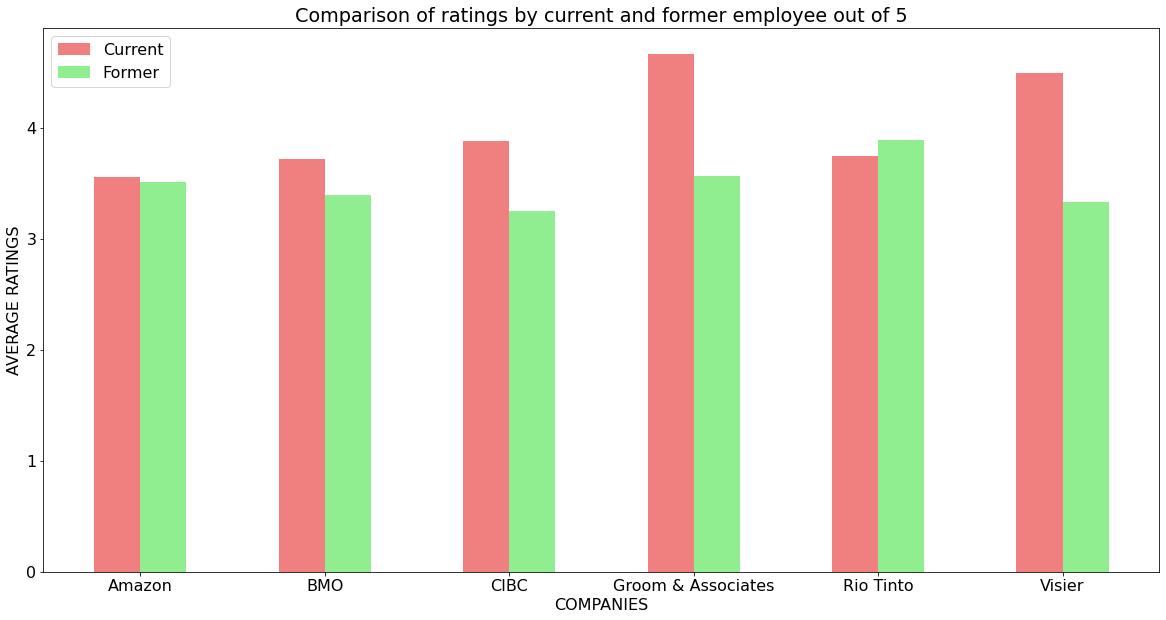

In [13]:
font = {'size'   : 16}

plt.rc('font', **font)

plt.figure(figsize=(20,10))

r1 = np.arange(len(df_company_rat_current))
r2 = [x + 0.25 for x in r1]

p1 = plt.bar(r1, df_company_rat_current['rating'], width=0.25, color='lightcoral', align='center')
p2 = plt.bar(r2, df_company_rat_former['rating'], width=0.25, color='lightgreen', align='center')


plt.xticks([r + 0.125 for r in range(len(df_company_rat_current))], \
           ['Amazon', 'BMO', 'CIBC', 'Groom & Associates', 'Rio Tinto','Visier'])

plt.title('Comparison of ratings by current and former employee out of 5')
plt.xlabel('COMPANIES')
plt.ylabel('AVERAGE RATINGS')

plt.legend((p1[0], p2[0]), ('Current', 'Former'))

plt.show()

In [14]:
# Average polarity of a company for current employees
df_company_pol_current = df_current_emp.groupby('company')['polarity'].mean()
df_company_pol_current

company
amazon                 0.275872
bmo financial group    0.248380
cibc                   0.289045
groom & associates     0.348643
rio tinto              0.177081
visier                 0.318645
Name: polarity, dtype: float64

In [15]:
# Average polarity of a company for previous employees
df_company_pol_former = df_former_emp.groupby('company')['polarity'].mean()
df_company_pol_former

company
amazon                 0.243489
bmo financial group    0.213600
cibc                   0.178685
groom & associates     0.206513
rio tinto              0.147873
visier                 0.273159
Name: polarity, dtype: float64

#  Visualization using Bar Chart for Polarities

In [16]:
df_company_pol_current.iplot(
    kind='bar',
    linecolor='black',
    xTitle='Companies',
    yTitle='Average Polarity',
    color = 'Red',
    title='Average polarity wrt reviews by Current Employees')

In [17]:
df_company_pol_former.iplot(
    kind='bar',
    linecolor='black',
    xTitle='Companies',
    yTitle='Average Polarity',
    color = 'Green',
    title='Average polarity wrt reviews by Previous Employees')

In [18]:
df_company_pol_former = df_company_pol_former.reset_index()
df_company_pol_current = df_company_pol_current.reset_index()

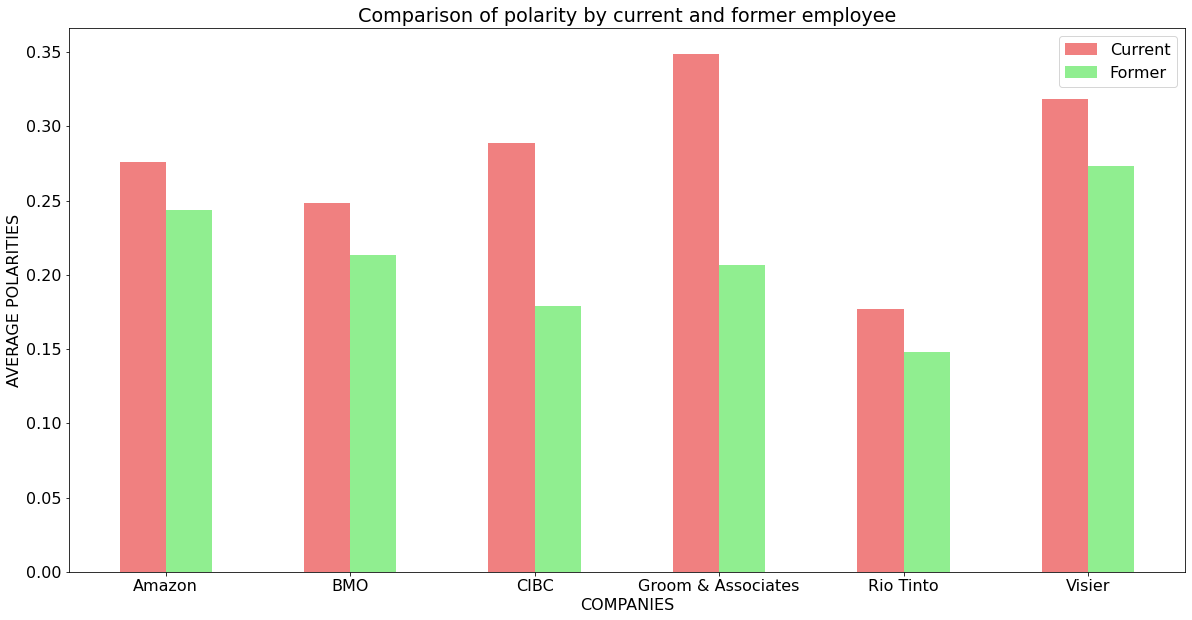

In [19]:
font = {'size'   : 16}

plt.rc('font', **font)

plt.figure(figsize=(20,10))

r1 = np.arange(len(df_company_pol_current))
r2 = [x + 0.25 for x in r1]

p3 = plt.bar(r1, df_company_pol_current['polarity'], width=0.25, color='lightcoral', align='center')
p4 = plt.bar(r2, df_company_pol_former['polarity'], width=0.25, color='lightgreen', align='center')


plt.xticks([r + 0.125 for r in range(len(df_company_pol_current))], \
           ['Amazon', 'BMO', 'CIBC', 'Groom & Associates', 'Rio Tinto','Visier'])

plt.title('Comparison of polarity by current and former employee')
plt.xlabel('COMPANIES')
plt.ylabel('AVERAGE POLARITIES')

plt.legend((p3[0], p4[0]), ('Current', 'Former'))

plt.show()

# Visualization of Reviews through Word Cloud

In [20]:
df_positive = df[df['polarity'] >= 0]
df_negative = df[df['polarity'] < -0.01]

In [21]:
df_positive.head(5)

,id,company,rating,author,author_status,location,date,description,source,polarity
0,1,bmo financial group,3.0,Credit Analyst (Current Employee),N/A,"Burnaby, BC",11 July 2018,Not a bad job but can get boring easily. Manag...,indeed.com,0.154762
1,2,bmo financial group,3.0,Project Manager (Former Employee),N/A,"Toronto, ON",7 April 2020,co-workers are friendly but pay is not good at...,indeed.com,0.151190
2,3,bmo financial group,1.0,Assistant Manager (Former Employee),N/A,"Cambridge, ON",6 April 2020,They give you the illusion of how great of a j...,indeed.com,0.179167
3,4,bmo financial group,2.0,Software Specialist (Former Employee),N/A,"Toronto, ON",6 April 2020,"Basically, in BMO agile team, they hire 5+ per...",indeed.com,0.000000
4,5,bmo financial group,5.0,Relationship Manager (Current Employee),N/A,"Nanaimo, BC",4 April 2020,Work/life balance and customer centric. Traini...,indeed.com,0.250000


In [22]:
df_negative.head(5)

,id,company,rating,author,author_status,location,date,description,source,polarity
12,13,bmo financial group,1.0,Fraud Manager (Former Employee),N/A,"Toronto, Ontario",28 March 2020,Senior Manager micro management along with unf...,indeed.com,-0.175000
13,14,bmo financial group,1.0,Personal Lending and Investment Specialist (Cu...,N/A,"Mississauga, ON",26 March 2020,Working at BMO is safe and stable unless you a...,indeed.com,-0.129167
27,28,bmo financial group,1.0,Assistant Manager Trainee (Former Employee),N/A,"Edmonton, AB",12 March 2020,I was treated unfairly and the management trai...,indeed.com,-0.225000
29,30,bmo financial group,2.0,Director - Market Risk Infrastructure (Former ...,N/A,"Toronto, ON",11 March 2020,"Difficult place to work, at least in my person...",indeed.com,-0.266667
38,39,bmo financial group,2.0,Investment Representative (Former Employee),N/A,"Calgary, AB",4 March 2020,I actually enjoyed my position until I was for...,indeed.com,-0.200000


In [23]:
positive_reviews = df_positive['description'].str.cat(sep=' ')
negative_reviews = df_negative['description'].str.cat(sep=' ')

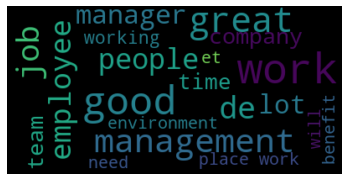

In [24]:
wordcloud = WordCloud(stopwords=STOPWORDS,max_font_size=50, max_words=20).generate(positive_reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

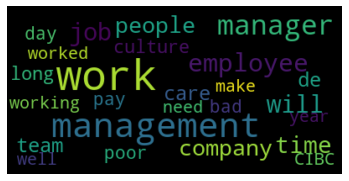

In [25]:
wordcloud = WordCloud(stopwords=STOPWORDS,max_font_size=50, max_words=25).generate(negative_reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()